# Данные о 50 крупнейших криптовалютах по рыночной капитализации.

**Описание задачи:**

Задача заключается в проведении базового анализа рынка криптовалют с использованием данных CoinMarketCap. Вам нужно будет собрать, очистить и проанализировать данные, а затем представить свои выводы в виде отчета, включающего как письменные резюме, так и визуализацию.


**Задачи:**

- Сбор данных: С помощью CoinMarketCap собрать данные о 50 крупнейших криптовалютах по рыночной капитализации.
- Очистка данных: Подготовьте данные к анализу, очистив и структурировав их должным образом.
- Анализ данных: Анализ данных с целью извлечения значимых выводов.
- Визуализация данных: Создание визуальных представлений полученных результатов в  PowerBI или подобных системах.
- Написание отчета: Обобщите результаты анализа и выводы в письменном отчете.



**План работ:**

- Шаг 1: Сбор данных
    - При необходимости зарегистрируйте API-ключ на сайте CoinMarketCap.
    - Используйте API или веб-сайт для получения следующей информации о 50 крупнейших криптовалютах по рыночной капитализации:
        - *Тикер*
        - *Текущая цена*
        - *Объем за 24 часа*
        - *Рыночная капитализация*
        - *Оборотное предложение*
        - *Процент изменения цены (24 часа)*

- Шаг 2: Очистка данных
    - Удалите все дубликаты и неактуальные записи.
    - Проверьте и соответствующим образом обработайте отсутствующие или нулевые значения.
    - Убедитесь, что все числовые данные представлены в правильном формате для анализа.

- Шаг 3: Анализ данных
    - Рассчитайте среднее и медианное значение рыночной стоимости 50 крупнейших криптовалют.
    - Определите 5 лучших криптовалют по 24-часовому объему.
    - Проанализируйте распределение изменений цен, чтобы определить, является ли рынок в настоящее время волатильным.

- Шаг 4: Визуализация данных
    - Постройте гистограмму 10 лучших криптовалют по рыночной стоимости.
    - Постройте круговую диаграмму, показывающую относительную рыночную стоимость 5 ведущих криптовалют по сравнению с остальными.
    - Построить диаграмму рассеяния, сравнивающую рыночную стоимость и 24-часовой объем 50 ведущих криптовалют.
    - Обсудите любые закономерности и тенденции, которые вы заметили в данных.
    - Дайте краткое объяснение потенциальных последствий полученных результатов для инвесторов.


In [82]:
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt

## Сбор данных

In [83]:

def fetch_top_10_crypto_data():
    # URL for CoinMarketCap API to fetch top 10 cryptocurrencies
    url = "https://api.coinmarketcap.com/data-api/v3/cryptocurrency/listing?start=1&limit=50&sortBy=market_cap&sortType=desc&convert=USD&cryptoType=all&tagType=all&audited=false"

    # Send a request to the API
    response = requests.get(url)
    data = response.json()

    # Extract relevant data
    crypto_data = []
    for crypto in data['data']['cryptoCurrencyList']:
        name = crypto['name']
        ticker = crypto['symbol']
        price = crypto['quotes'][0]['price']
        volume_24h = crypto['quotes'][0]['volume24h']
        market_cap = crypto['quotes'][0]['marketCap']
        circulating_supply = crypto['circulatingSupply']
        percent_change_24h = crypto['quotes'][0]['percentChange24h']

        crypto_data.append([
            name, ticker, price, volume_24h, market_cap, circulating_supply, percent_change_24h
        ])

    return crypto_data

def save_to_csv(data, filename):
    # Column headers
    headers = ['name', 'ticker', 'price', '24h_volume', 'market_cap', 'circulating_supply', '24h_price_change']

    # Writing to CSV
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(data)

# Fetch the data
crypto_data = fetch_top_10_crypto_data()

# Save the data to a CSV file
save_to_csv(crypto_data, 'top_10_cryptocurrencies.csv')

In [84]:
df=pd.read_csv('top_10_cryptocurrencies.csv')
df

,name,ticker,price,24h_volume,market_cap,circulating_supply,24h_price_change
0,Bitcoin,BTC,37052.626273,2.154040e+10,7.239759e+11,1.953912e+07,1.255348
1,Ethereum,ETH,2057.797435,1.337071e+10,2.474744e+11,1.202618e+08,-2.253947
2,Tether USDt,USDT,1.000500,4.928193e+10,8.671727e+10,8.667394e+10,0.048510
3,BNB,BNB,248.790477,8.247038e+08,3.774199e+10,1.517019e+08,-1.736763
4,XRP,XRP,0.654174,1.931430e+09,3.509826e+10,5.365277e+10,-0.592662
5,USDC,USDC,0.999987,5.573576e+09,2.415631e+10,2.415662e+10,0.011207
6,Solana,SOL,55.314598,4.009517e+09,2.328986e+10,4.210436e+08,15.883256
7,Cardano,ADA,0.378345,5.622094e+08,1.334369e+10,3.526857e+10,1.724626
8,Dogecoin,DOGE,0.079505,9.370154e+08,1.127233e+10,1.417823e+11,6.843085
9,TRON,TRX,0.105833,7.731304e+08,9.387675e+09,8.870306e+10,5.625146


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                50 non-null     object 
 1   Ticker              50 non-null     object 
 2   Price               50 non-null     float64
 3   24h_Volume          50 non-null     float64
 4   Market_Cap          50 non-null     float64
 5   Circulating_Supply  50 non-null     float64
 6   24h_Price_Change    50 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


Получили таблицу с 50 строками в 7 столбцах. Первые два с названием и тикером криптовалюты в строковом формате, остальные с числовыми значения в формате float. Пропусков в столбцах нет.

## Очистка данных

In [74]:
# полные дубликаты
df.duplicated().sum()

0

In [86]:
df['name'].duplicated().sum()

0

In [76]:
df['ticker'].duplicated().sum()

0

## Анализ данных

### Рассчитайте среднее и медианное значение рыночной стоимости 50 крупнейших криптовалют.

In [138]:
print('Средняя стоимость ${:.2f}'.format(df['market_cap'].mean()))

Средняя стоимость $26765139114.98


In [139]:
print('Медианное значение стоимости ${:.2f}'.format(df['market_cap'].median()))

Медианное значение стоимости $3254281803.94


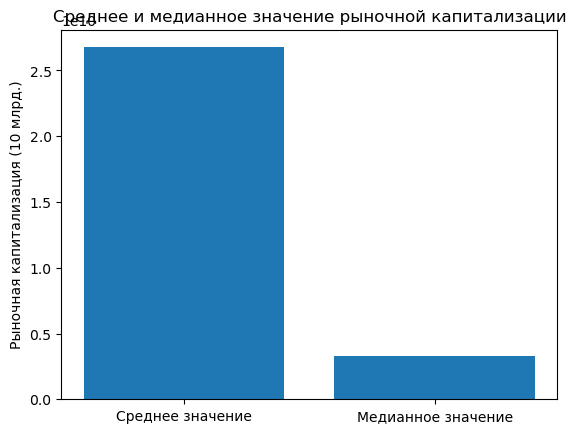

In [151]:
# Постройте столбчатую диаграмму
plt.bar(['Среднее значение', 'Медианное значение'], [df['market_cap'].mean(), df['market_cap'].median()])

# Добавьте заголовок и метки осей
plt.title('Среднее и медианное значение рыночной капитализации')
plt.ylabel('Рыночная капитализация (10 млрд.)')

plt.show()

**Вывод по значениям:**
Средняя рыночная стоимомость превосходит медианное значение рыночной стоимости более чем в 8 раз. Это говорит о том, что среди исследуемых криптовалют есть криптовалюты, существенно опержающие по своей капитализации конкурентов.

### Определите 5 лучших криптовалют по 24-часовому объему.

In [95]:
top_24h_volume = df.sort_values(by= '24h_volume', ascending=False).head()
top_24h_volume

,name,ticker,price,24h_volume,market_cap,circulating_supply,24h_price_change
2,Tether USDt,USDT,1.000500,4.928193e+10,8.671727e+10,8.667394e+10,0.048510
0,Bitcoin,BTC,37052.626273,2.154040e+10,7.239759e+11,1.953912e+07,1.255348
1,Ethereum,ETH,2057.797435,1.337071e+10,2.474744e+11,1.202618e+08,-2.253947
5,USDC,USDC,0.999987,5.573576e+09,2.415631e+10,2.415662e+10,0.011207
6,Solana,SOL,55.314598,4.009517e+09,2.328986e+10,4.210436e+08,15.883256


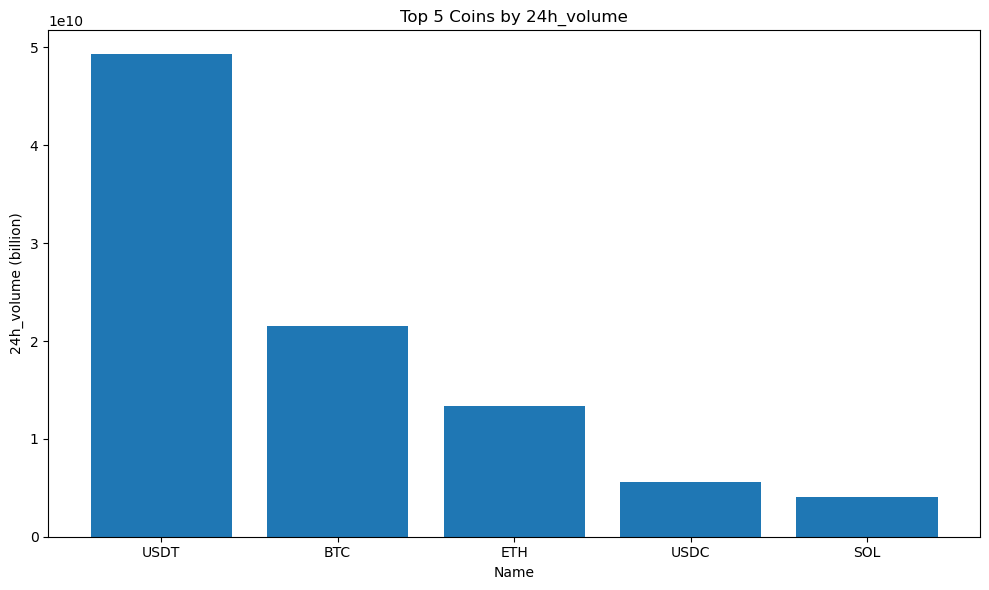

In [100]:
# Построение столбчатой диаграммы с добавлением теней
plt.figure(figsize=(10, 6))
plt.bar(top_24h_volume['ticker'], top_24h_volume['24h_volume'])
plt.xlabel('Name')
plt.ylabel('24h_volume (billion)')
plt.title('Top 5 Coins by 24h_volume')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Вывод по объему продаж:**
Лидер по объему продаж `USDT` превосходит следующего за ним конкурента `BTC` более чем в 2 раза. Объем продаж лидера за сутки составляет более 49 миллиардов USD.

### Проанализируйте распределение изменений цен, чтобы определить, является ли рынок в настоящее время волатильным.

In [105]:
df['24h_price_change'].describe()

count    50.000000
mean      3.022404
std       8.161877
min      -5.866790
25%      -1.351553
50%       0.102907
75%       5.121404
max      45.057786
Name: 24h_price_change, dtype: float64

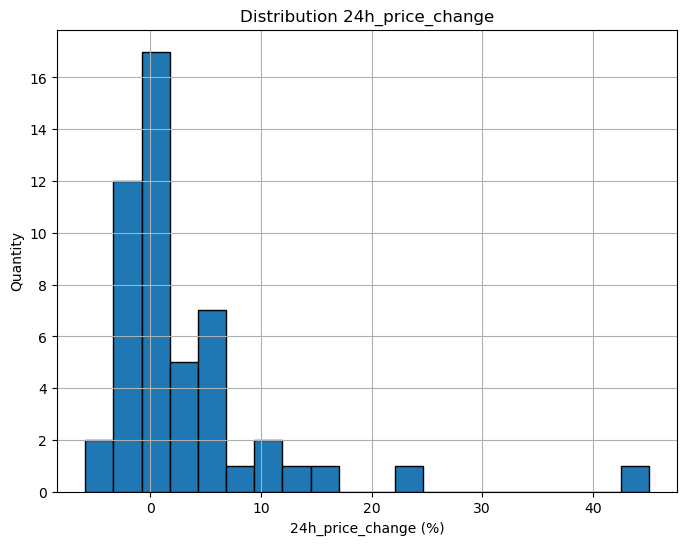

In [109]:
# Построение гистограммы изменений цен
plt.figure(figsize=(8, 6))
plt.hist(df['24h_price_change'], bins=20, edgecolor='k')
plt.xlabel('24h_price_change (%)')
plt.ylabel('Quantity')
plt.title('Distribution 24h_price_change')
plt.grid(True)

plt.show()

**Вывод по волатильности:**
По графику видно, что 13 из 50 валют изменились за сутки на более, чем 5%. Такой рынок можно уверенно назвать волотильным: 26% из представленных валют изменились более, чем на 5%. Есть валюта, которая выросла в цене за сутки на 45%!

## Визуализация данных

### Постройте гистограмму 10 лучших криптовалют по рыночной стоимости.

In [77]:
# топ-10 по цене
df_price = df.sort_values(by = 'price', ascending=False)
df_price_10 = df_price.head(10)

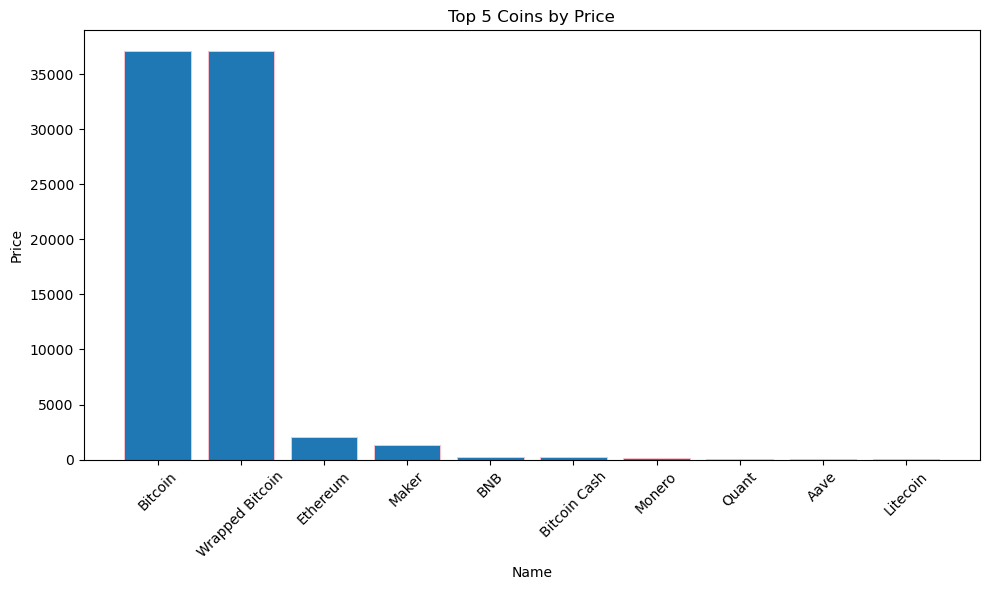

In [124]:
# Построение столбчатой диаграммы с добавлением теней
plt.figure(figsize=(10, 6))
bars = plt.bar(df_price_10['name'], df_price_10['price'], edgecolor='black')
plt.xlabel('Name')
plt.ylabel('Price')
plt.title('Top 5 Coins by Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем тени к столбцам
for bar in bars:
    bar.set_linewidth(0.7)  # Ширина границы столбца
    bar.set_edgecolor('pink')  # Цвет границы столбца
    

plt.show()

**Вывод по топ-10 по цене:**
Вторая по стоимости криптовалюта практически равна лидеру, но при этом занимает лишь 15 место по капитализации. Это говорит о том, что WBTC имет малое количество монет по сравнению с лидером. 

### Постройте круговую диаграмму, показывающую относительную рыночную стоимость 5 ведущих криптовалют по сравнению с остальными.

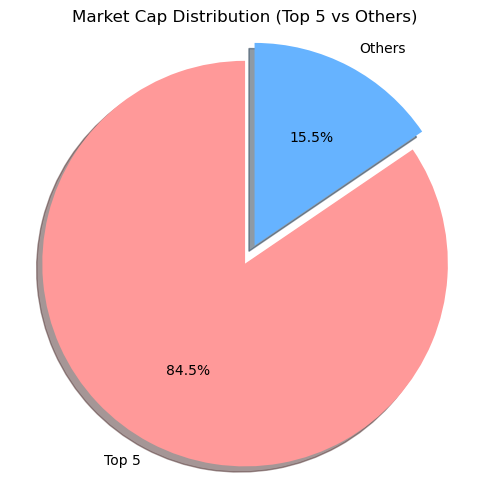

In [125]:
#Постройте круговую диаграмму, показывающую относительную рыночную стоимость 5 ведущих криптовалют по сравнению с остальными.

# Вычисляем сумму рыночной стоимости для пяти ведущих криптовалют
top_5_market_cap = df['market_cap'].head(5).sum()

# Вычисляем рыночную стоимость остальных криптовалют
other_market_cap = df['market_cap'].sum() - top_5_market_cap

# Создаем данные для круговой диаграммы
labels = ['Top 5', 'Others']
sizes = [top_5_market_cap, other_market_cap]
colors = ['#ff9999', '#66b3ff']  # Цвета для сегментов
explode = (0.1, 0)  # Отделение сегмента "Top 5" от центра

# Построение круговой диаграммы
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Market Cap Distribution (Top 5 vs Others)')
plt.axis('equal')  # Делает круговую диаграмму круглой

plt.tight_layout()
plt.show()

In [136]:
df.sort_values(by='market_cap', ascending=False).head()

,name,ticker,price,24h_volume,market_cap,circulating_supply,24h_price_change
0,Bitcoin,BTC,37052.626273,2.154040e+10,7.239759e+11,1.953912e+07,1.255348
1,Ethereum,ETH,2057.797435,1.337071e+10,2.474744e+11,1.202618e+08,-2.253947
2,Tether USDt,USDT,1.000500,4.928193e+10,8.671727e+10,8.667394e+10,0.048510
3,BNB,BNB,248.790477,8.247038e+08,3.774199e+10,1.517019e+08,-1.736763
4,XRP,XRP,0.654174,1.931430e+09,3.509826e+10,5.365277e+10,-0.592662


**Вывод:**
Топ-5 валют по капитализации занимают почти 85% рынка.

### Построить диаграмму рассеяния, сравнивающую рыночную стоимость и 24-часовой объем 50 ведущих криптовалют.

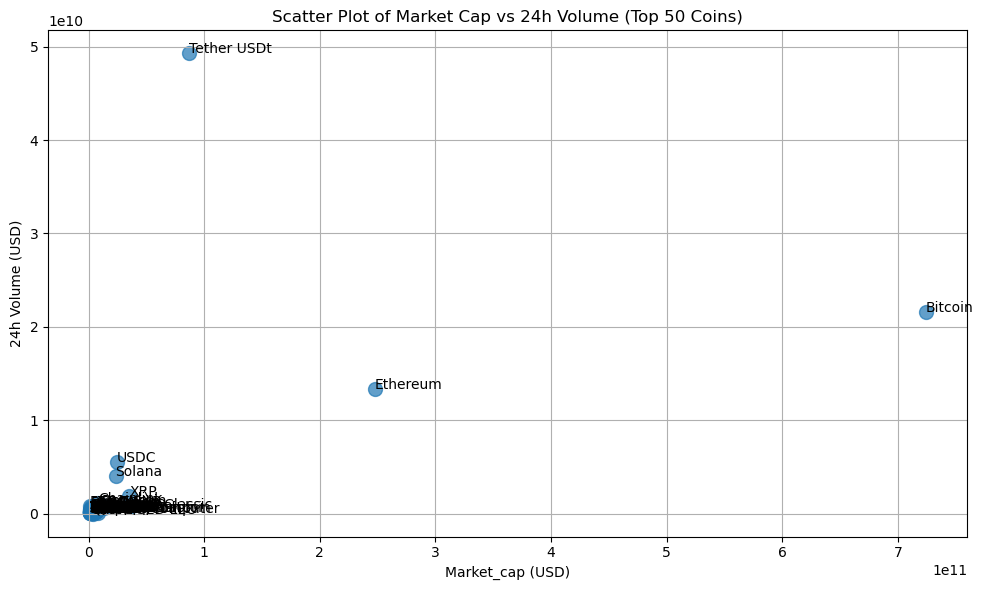

In [137]:
#Построить диаграмму рассеяния, сравнивающую рыночную стоимость и 24-часовой объем 50 ведущих криптовалют.
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df['market_cap'], df['24h_volume'], marker='o', s=100, alpha=0.7)
plt.xlabel('Market_cap (USD)')
plt.ylabel('24h Volume (USD)')
plt.title('Scatter Plot of Market Cap vs 24h Volume (Top 50 Coins)')
plt.grid(True)  # Включаем сетку на графике

# Добавляем подписи для каждой точки
for i, name in enumerate(df['name']):
    plt.annotate(name, (df['market_cap'][i], df['24h_volume'][i]), fontsize=10)
    
plt.tight_layout()
plt.show()

In [129]:
df.sort_values(by='24h_volume', ascending=False).head()

,name,ticker,price,24h_volume,market_cap,circulating_supply,24h_price_change
2,Tether USDt,USDT,1.000500,4.928193e+10,8.671727e+10,8.667394e+10,0.048510
0,Bitcoin,BTC,37052.626273,2.154040e+10,7.239759e+11,1.953912e+07,1.255348
1,Ethereum,ETH,2057.797435,1.337071e+10,2.474744e+11,1.202618e+08,-2.253947
5,USDC,USDC,0.999987,5.573576e+09,2.415631e+10,2.415662e+10,0.011207
6,Solana,SOL,55.314598,4.009517e+09,2.328986e+10,4.210436e+08,15.883256


**Вывод:**
Криптовалюты с наибольшей капитализацией показывают хорошие цифры суточного объема продаж. 


In [148]:
df.sort_values(by = 'price', ascending=False).head(12)

,name,ticker,price,24h_volume,market_cap,circulating_supply,24h_price_change
0,Bitcoin,BTC,37052.626273,2.154040e+10,7.239759e+11,1.953912e+07,1.255348
14,Wrapped Bitcoin,WBTC,37050.366273,2.208150e+08,6.070401e+09,1.638419e+05,1.146750
1,Ethereum,ETH,2057.797435,1.337071e+10,2.474744e+11,1.202618e+08,-2.253947
47,Maker,MKR,1298.183000,9.277280e+07,1.269144e+09,9.776310e+05,-3.236103
3,BNB,BNB,248.790477,8.247038e+08,3.774199e+10,1.517019e+08,-1.736763
19,Bitcoin Cash,BCH,236.382683,2.071153e+08,4.622632e+09,1.955571e+07,-1.420877
26,Monero,XMR,170.597072,1.051399e+08,3.131569e+09,1.835652e+07,-0.717863
46,Quant,QNT,107.276697,2.363913e+07,1.295123e+09,1.207274e+07,0.545334
43,Aave,AAVE,96.313045,1.920253e+08,1.409272e+09,1.463220e+07,-1.786491
17,Litecoin,LTC,72.391652,3.657117e+08,5.346872e+09,7.386034e+07,-1.143583


In [142]:
df.sort_values(by='market_cap', ascending=False).head(10)

,name,ticker,price,24h_volume,market_cap,circulating_supply,24h_price_change
0,Bitcoin,BTC,37052.626273,2.154040e+10,7.239759e+11,1.953912e+07,1.255348
1,Ethereum,ETH,2057.797435,1.337071e+10,2.474744e+11,1.202618e+08,-2.253947
2,Tether USDt,USDT,1.000500,4.928193e+10,8.671727e+10,8.667394e+10,0.048510
3,BNB,BNB,248.790477,8.247038e+08,3.774199e+10,1.517019e+08,-1.736763
4,XRP,XRP,0.654174,1.931430e+09,3.509826e+10,5.365277e+10,-0.592662
5,USDC,USDC,0.999987,5.573576e+09,2.415631e+10,2.415662e+10,0.011207
6,Solana,SOL,55.314598,4.009517e+09,2.328986e+10,4.210436e+08,15.883256
7,Cardano,ADA,0.378345,5.622094e+08,1.334369e+10,3.526857e+10,1.724626
8,Dogecoin,DOGE,0.079505,9.370154e+08,1.127233e+10,1.417823e+11,6.843085
9,TRON,TRX,0.105833,7.731304e+08,9.387675e+09,8.870306e+10,5.625146


## Общий вывод:


- Почти **85%** рынка по капитализации заимают всего **5** криптовалют
- Рынок имеет хорошую волотильность: **13** из 50 криптовалют изменились в цене более, чем на **5%**. В тройке лидеров по росту: `FTX Token`(45%), `Cronos`(24%), **`Solana`(16%)** 
- `USDC` и **`Solana`** превосходят по суточному объёму продаж двух замыкающих топ-5 по капитализации `BNB` и `XRP`. На них стоит обратить внимание.
- **Рекомендуется обратить внимание на криптовалюту `Solana` (SOL), которая по капитализации на 7 месте, по суточному объёму продаж на 5, выросла за последние 24 часа на 16% (3 место), а по цене находится на 12 месте. Все это вместе делает `Solana` довольно привлекательной для инвестиций.** 